# Visuals for NFL Receiver Clusters
- 2018 regular season statistics for all players targeted at least once.
- Data sourced from [Pro-Football-Reference](https://www.pro-football-reference.com/years/2018/receiving.htm)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import yellowbrick.datasets as ybdata

%matplotlib inline

In [2]:
nfl_df = (ybdata.load_nfl(return_dataset=True)
                .to_dataframe()
                .query('Tgt >= 20'))

In [3]:
nfl_df.head()

,Rk,Player,Id,Tm,Age,G,GS,Tgt,Rec,Ctch_Rate,...,FirstTeamAllPro,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,1,Michael Thomas,ThomMi05,NOR,25,16,16,147,125,0.850,...,1,0,0,0,0,0,0,0,0,1
1,2,Zach Ertz,ErtzZa00,PHI,28,16,16,156,116,0.744,...,0,0,0,0,0,0,0,0,1,0
2,3,DeAndre Hopkins,HopkDe00,HOU,26,16,16,163,115,0.706,...,1,0,0,0,0,0,0,0,0,1
3,4,Julio Jones,JoneJu02,ATL,29,16,16,170,113,0.665,...,0,0,0,0,0,0,0,0,0,1
4,5,Adam Thielen,ThieAd00,MIN,28,16,16,153,113,0.739,...,0,0,0,0,0,0,0,0,0,1


In [4]:
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = nfl_df[features].values

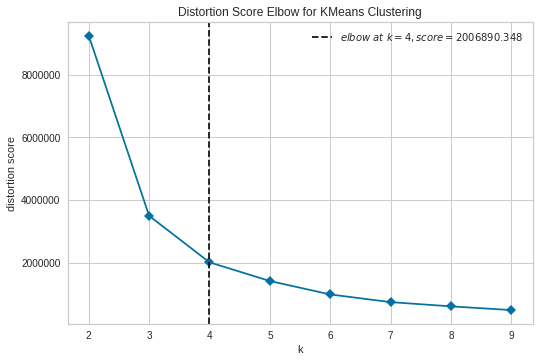

In [5]:
elbow_visualizer = KElbowVisualizer(KMeans(), k=(2,10), timings=False)
elbow_visualizer.fit(X)
elbow_visualizer.size = (600, 400)
elbow_visualizer.poof()

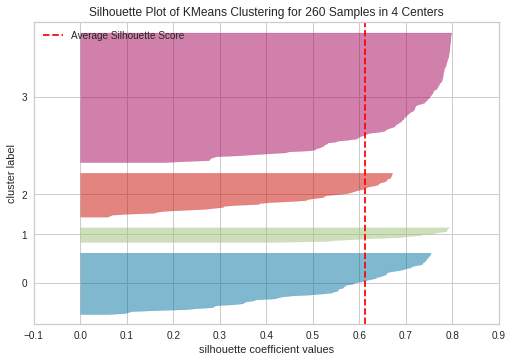

In [6]:
model = KMeans(4)
silhouette_visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

silhouette_visualizer.fit(X)
silhouette_visualizer.size = (600, 400)
silhouette_visualizer.poof()